In [ ]:
# 📦 Step 1: Import Required Libraries

# Data Manipulation and Analysis
import pandas as pd         # For handling datasets and dataframes
import numpy as np          # For numerical operations

# Data Visualization
import seaborn as sns       # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots and charts

# Machine Learning Model Building
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test
from sklearn.linear_model import LinearRegression      # For linear regression model
from sklearn.tree import DecisionTreeRegressor         # For decision tree regression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor  # For ensemble models

# Model Evaluation Metrics
from sklearn.metrics import r2_score, mean_squared_error  # For model performance evaluation

# Model Serialization
import pickle  # For saving and loading trained models


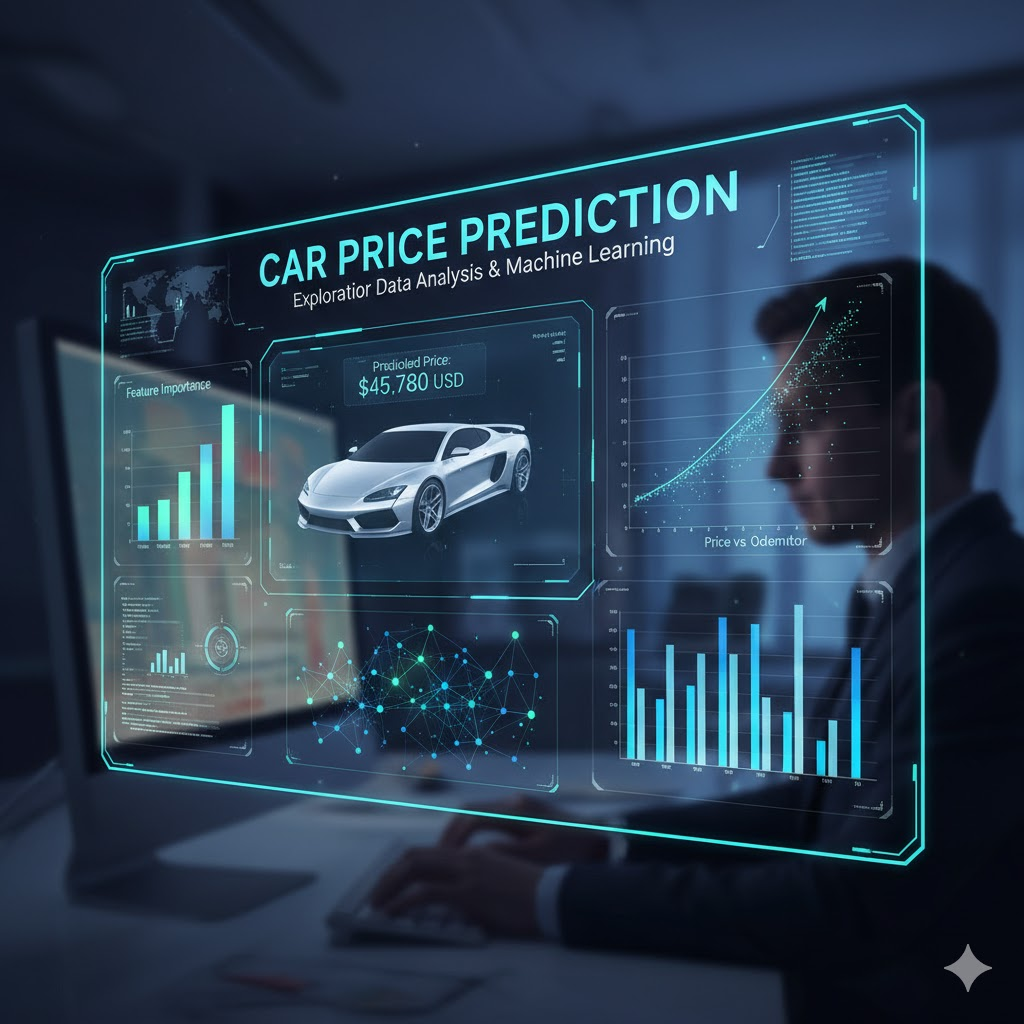

In [ ]:
# loading The File
df = pd.read_csv('CarPrice_Assignment.csv')

In [ ]:
df

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,2,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,1,1,2,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,1,1,2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0
3,1,1,4,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,1,1,4,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,4,1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23.0,28.0,16845.0
201,1,0,4,1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19.0,25.0,19045.0
202,1,1,4,1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18.0,23.0,21485.0
203,0,0,4,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,10.6,106,4800,26.0,27.0,22470.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    int64  
 1   aspiration        205 non-null    int64  
 2   doornumber        205 non-null    int64  
 3   enginelocation    205 non-null    int64  
 4   wheelbase         205 non-null    float64
 5   carlength         205 non-null    float64
 6   carwidth          205 non-null    float64
 7   carheight         205 non-null    float64
 8   curbweight        205 non-null    int64  
 9   enginesize        205 non-null    int64  
 10  boreratio         205 non-null    float64
 11  stroke            205 non-null    float64
 12  compressionratio  205 non-null    float64
 13  horsepower        205 non-null    int64  
 14  peakrpm           205 non-null    int64  
 15  citympg           205 non-null    float64
 16  highwaympg        205 non-null    float64
 1

In [ ]:
df.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.902439,0.819512,3.121951,1.043902,98.710976,174.049268,65.884390,53.724878,2555.565854,124.570732,3.329756,3.261805,9.039122,102.843902,5124.634146,25.204878,30.680488,13276.710571
std,0.297446,0.385535,0.994966,0.361132,5.882586,12.337289,2.083114,2.443522,520.680204,33.974343,0.270844,0.276855,0.793356,35.578896,475.493024,6.491659,6.682147,7988.852332
min,0.000000,0.000000,2.000000,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.660000,7.400000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,1.000000,1.000000,2.000000,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,1.000000,4.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,1.000000,1.000000,4.000000,1.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,1.000000,1.000000,4.000000,4.000000,114.250000,208.100000,71.100000,59.800000,4066.000000,207.000000,3.940000,3.860000,10.600000,185.000000,6550.000000,46.500000,47.500000,45400.000000


In [ ]:
# 🧹 Step 2: Drop Unnecessary Columns
cols_to_drop = [
    'CarName', 'car_ID', 'symboling',
    'carbody', 'enginetype', 'cylindernumber',
    'fuelsystem', 'drivewheel'
]

df.drop(columns=cols_to_drop, inplace=True)


In [ ]:
df

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,front,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,front,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,front,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,front,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,gas,turbo,four,front,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,gas,std,four,front,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,diesel,turbo,four,front,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
# 🔁 Step 3: Encode Categorical Variables using Mapping

# Convert string categories into numeric values for model compatibility
df['fueltype'] = df['fueltype'].map({'gas': 1, 'diesel': 0})          # Fuel type: gas = 1, diesel = 0
df['aspiration'] = df['aspiration'].map({'std': 1, 'turbo': 0})       # Aspiration type: std = 1, turbo = 0
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})        # Number of doors: two = 2, four = 4
df['enginelocation'] = df['enginelocation'].map({'front': 1, 'rear': 4})  # Engine location: front = 1, rear = 4


In [ ]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [ ]:
df

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,2,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,1,2,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,1,4,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,1,4,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,4,1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,1,0,4,1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,1,1,4,1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,0,0,4,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    int64  
 1   aspiration        205 non-null    int64  
 2   doornumber        205 non-null    int64  
 3   enginelocation    205 non-null    int64  
 4   wheelbase         205 non-null    float64
 5   carlength         205 non-null    float64
 6   carwidth          205 non-null    float64
 7   carheight         205 non-null    float64
 8   curbweight        205 non-null    int64  
 9   enginesize        205 non-null    int64  
 10  boreratio         205 non-null    float64
 11  stroke            205 non-null    float64
 12  compressionratio  205 non-null    float64
 13  horsepower        205 non-null    int64  
 14  peakrpm           205 non-null    int64  
 15  citympg           205 non-null    int64  
 16  highwaympg        205 non-null    int64  
 1

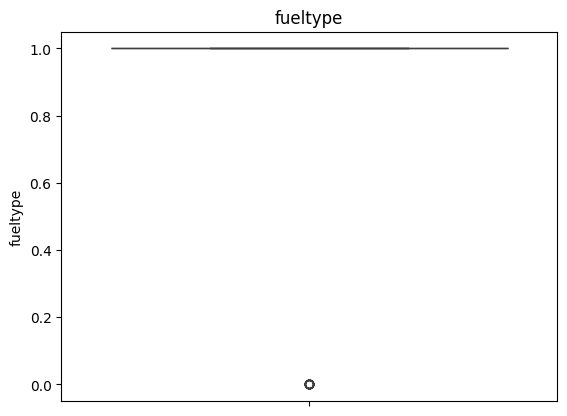

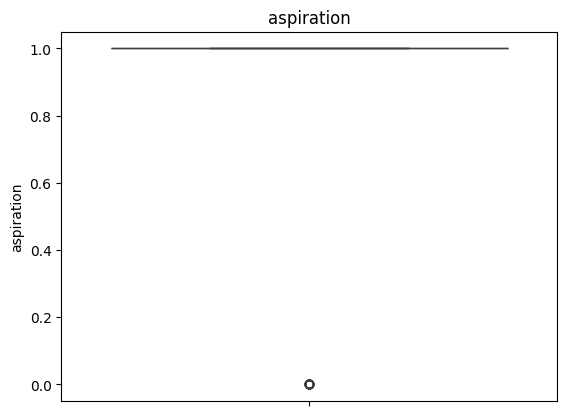

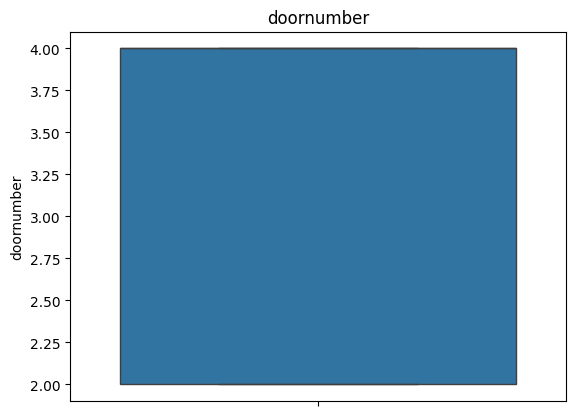

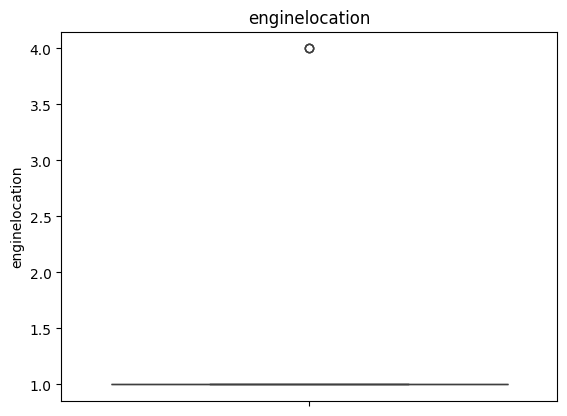

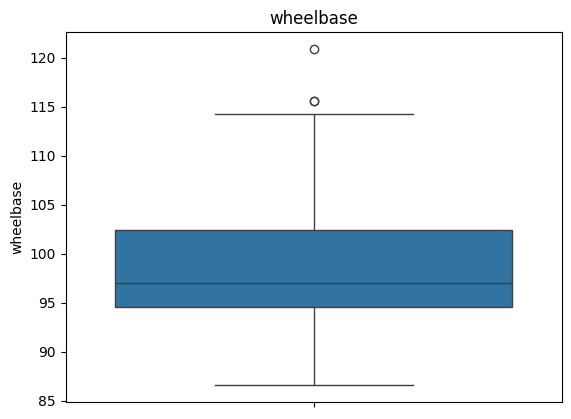

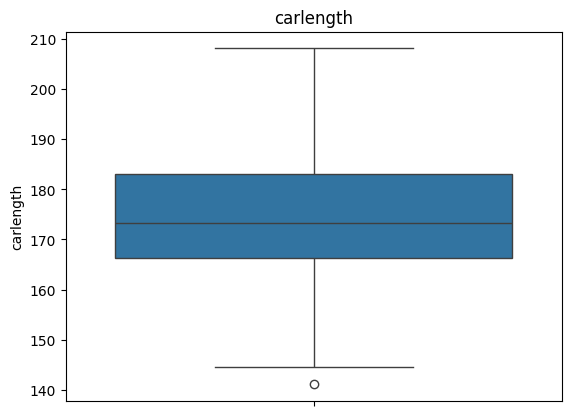

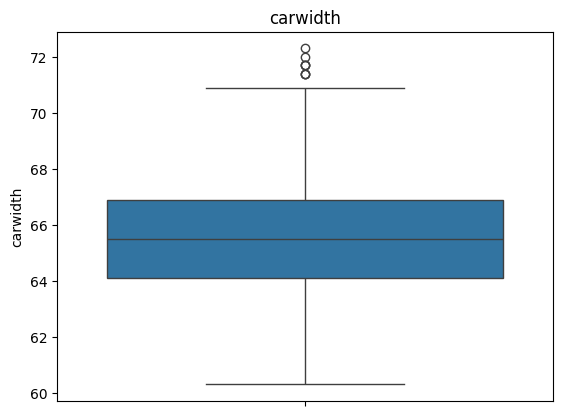

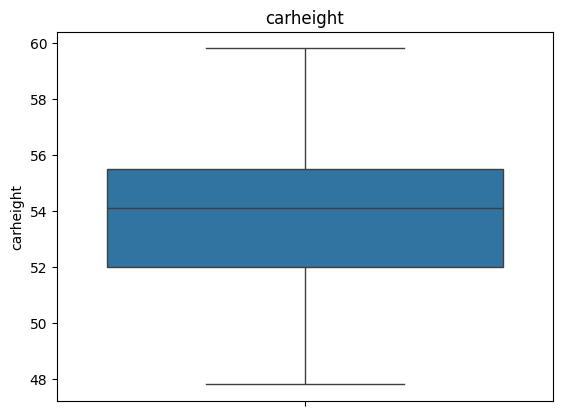

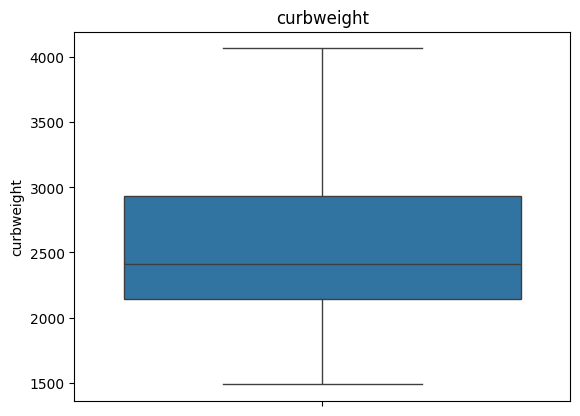

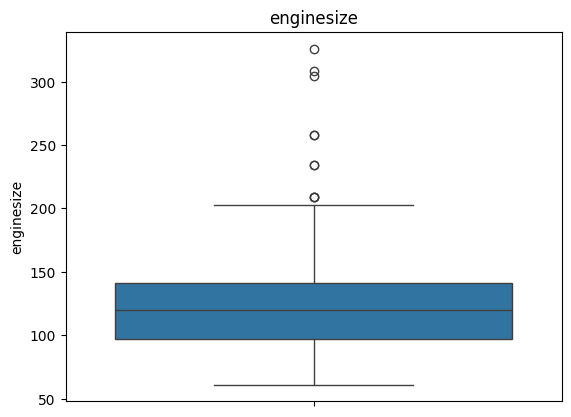

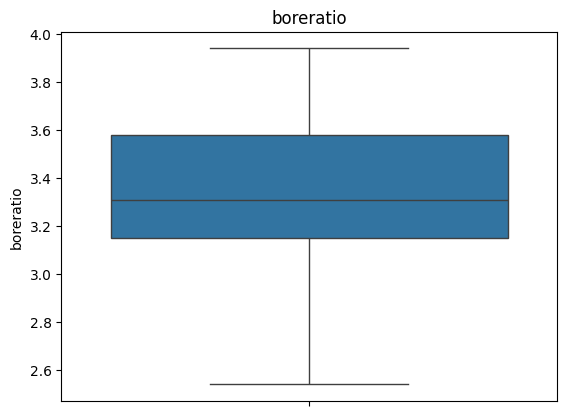

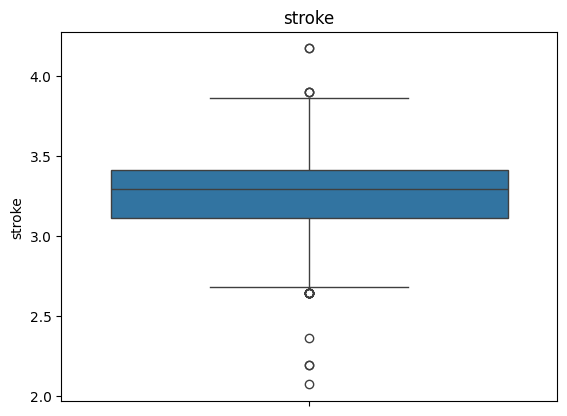

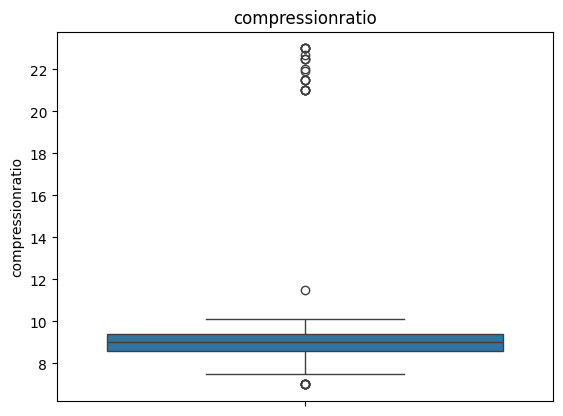

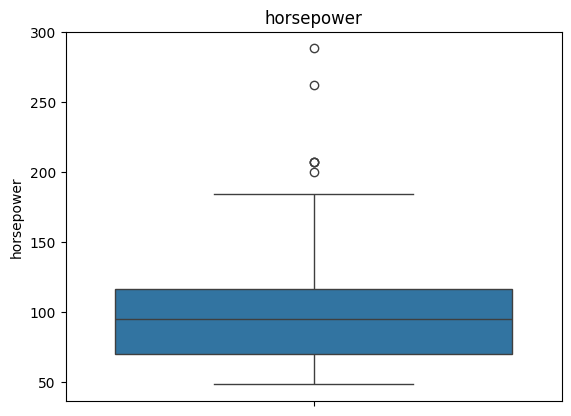

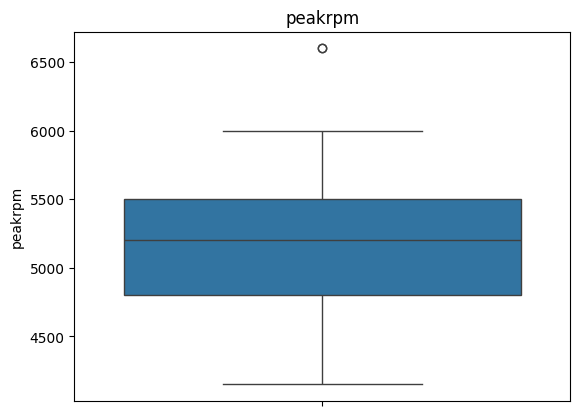

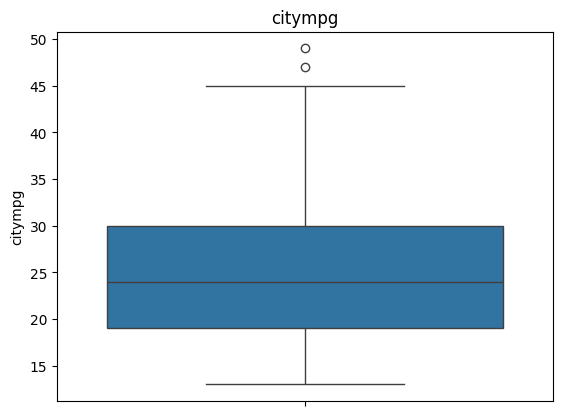

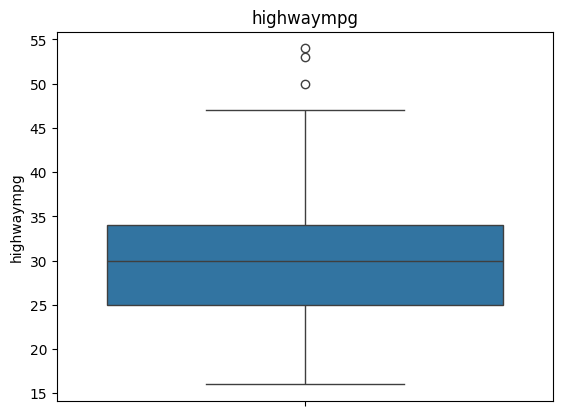

In [ ]:
# 📊 Step 4: Outlier Detection using Boxplots
# I'm doing this to visually detect the presence of outliers in each numerical column
for i in df.columns[:-1]:  # Loop through all columns except the last one
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[i])   # Correct syntax: specify the column using x=
    plt.title(f'Boxplot of {i}')  # Title for each feature
    plt.show()

<Axes: >

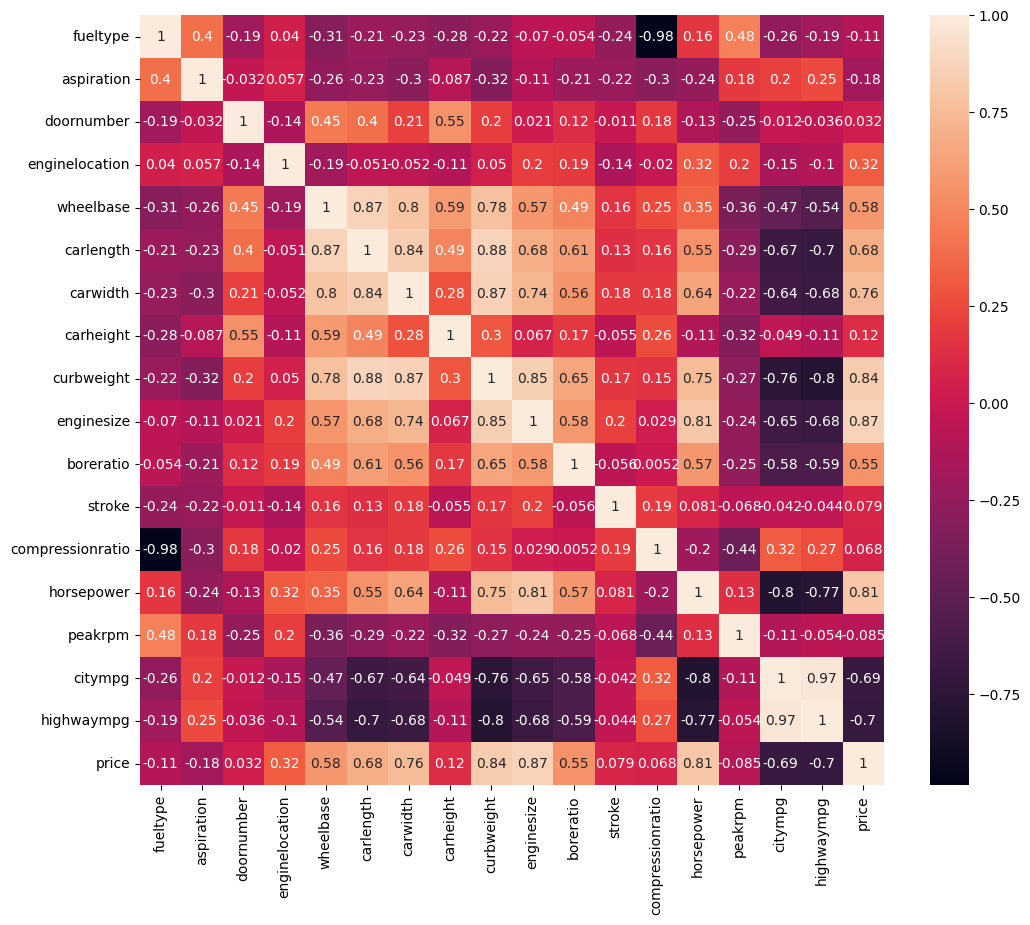

In [ ]:
# 🔥 Step 5: Correlation Analysis using Heatmap
# I'm doing this to find how strongly each feature is correlated with others and with the target variable.

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()


In [ ]:
# 🧹 Step 6: Removing Outliers using the IQR Method
# I'm doing this to cap (limit) extreme outlier values without deleting rows,
# ensuring that the data remains within a reasonable range.

for i in df.columns[4:-1]:  # Skip first 4 columns & the target column
    Q1 = df[i].quantile(0.25)   # 25th percentile
    Q3 = df[i].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1               # Interquartile Range (IQR)

    # Calculate lower and upper bounds
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap the outliers using clip() function
    df[i] = df[i].clip(lower, upper)


In [ ]:
df

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,2,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,1,1,2,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,1,1,2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0
3,1,1,4,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,1,1,4,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,4,1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23.0,28.0,16845.0
201,1,0,4,1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19.0,25.0,19045.0
202,1,1,4,1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18.0,23.0,21485.0
203,0,0,4,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,10.6,106,4800,26.0,27.0,22470.0


<Axes: >

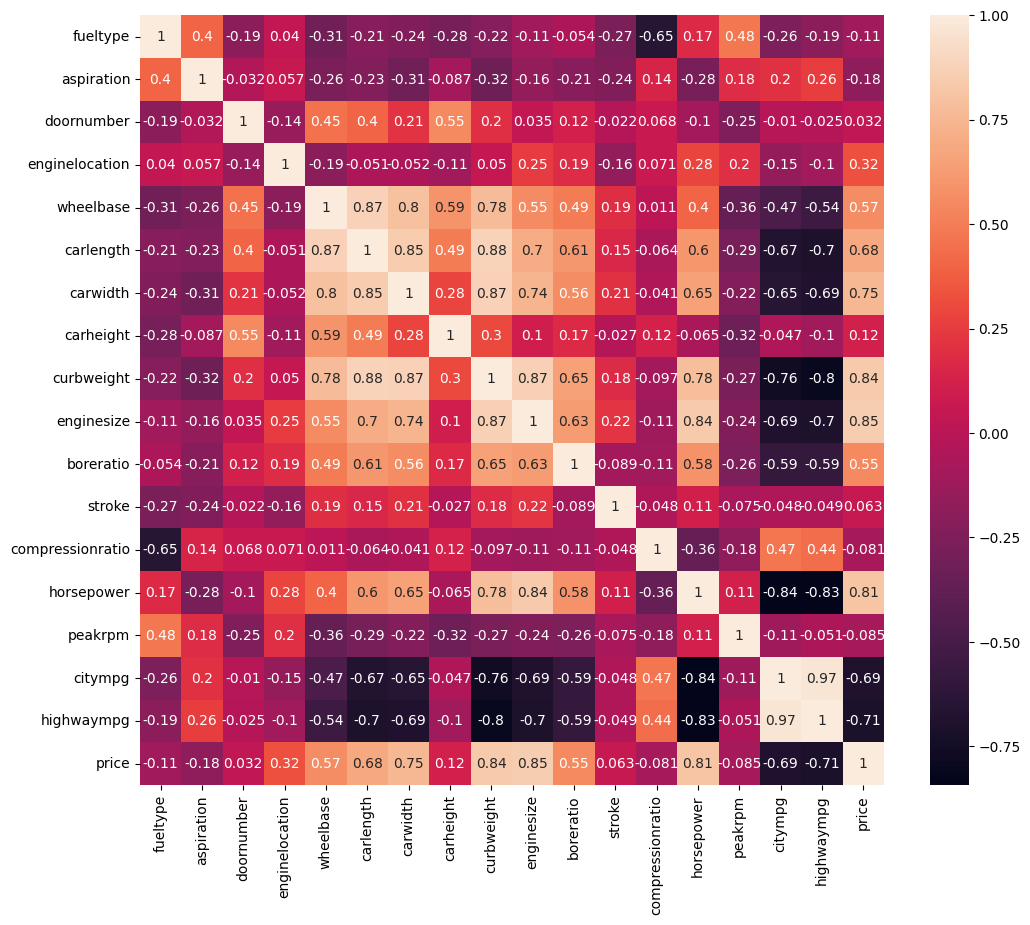

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot = True)

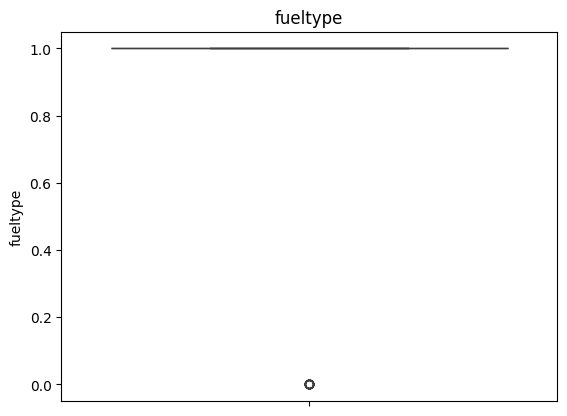

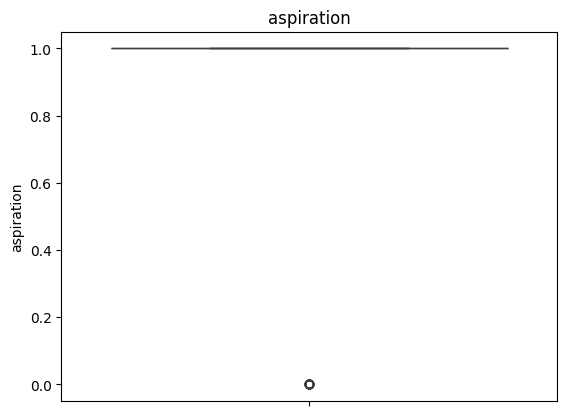

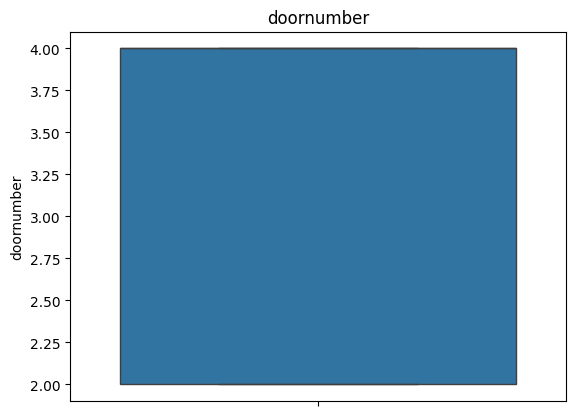

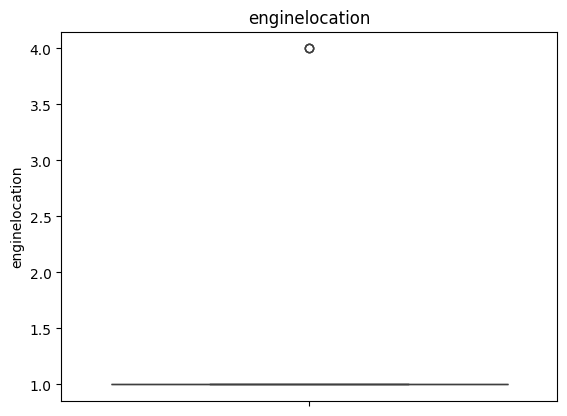

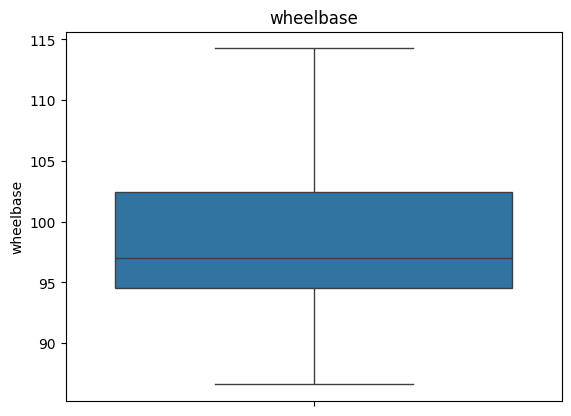

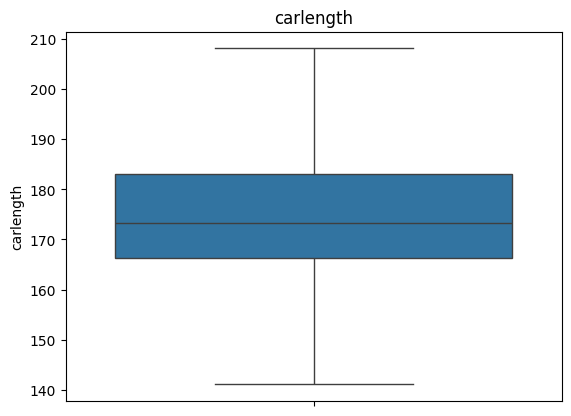

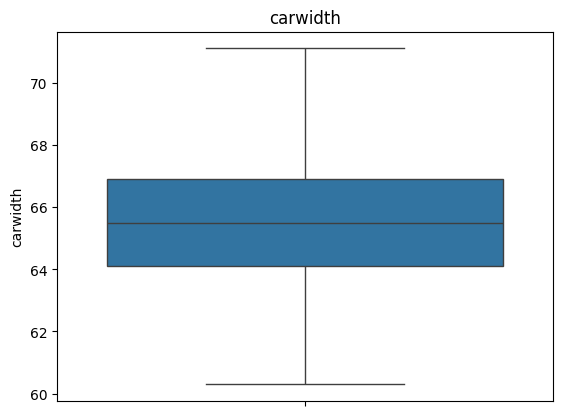

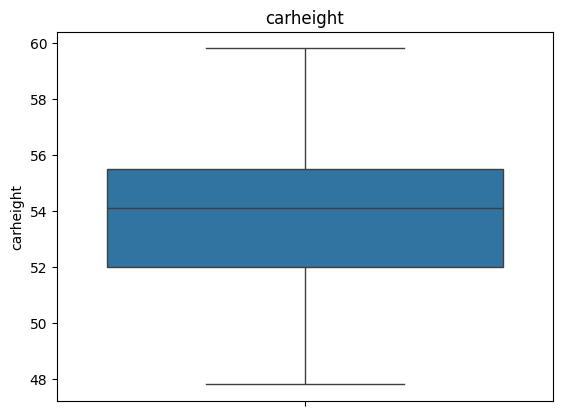

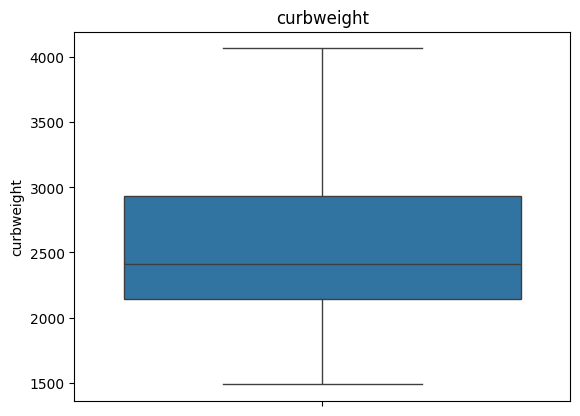

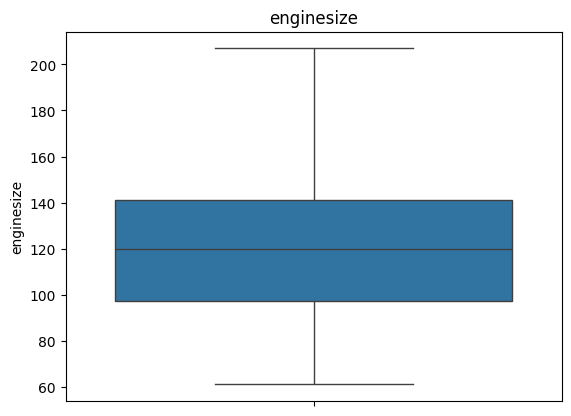

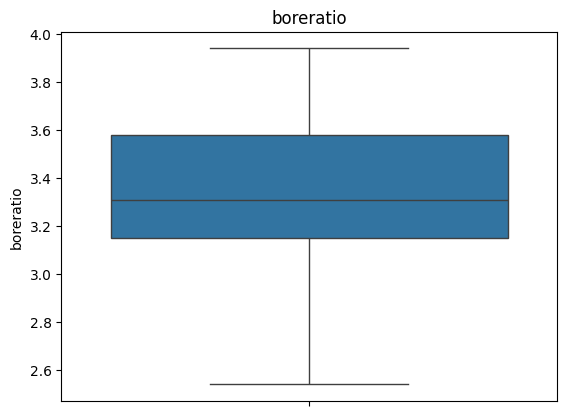

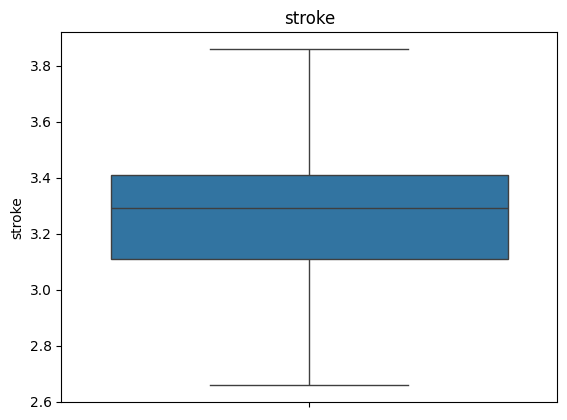

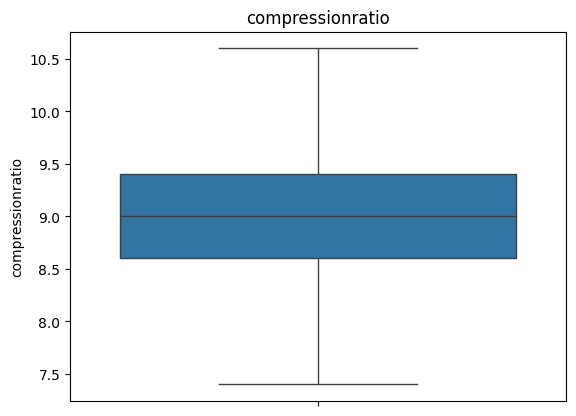

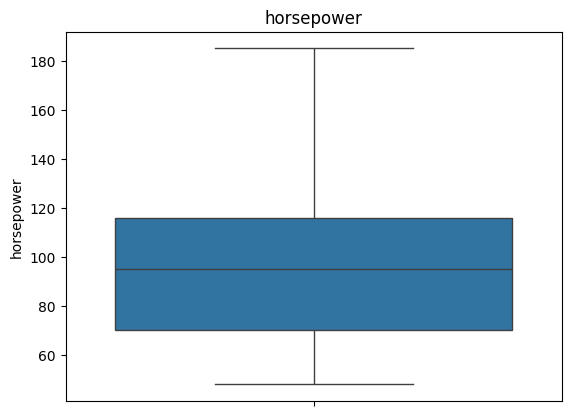

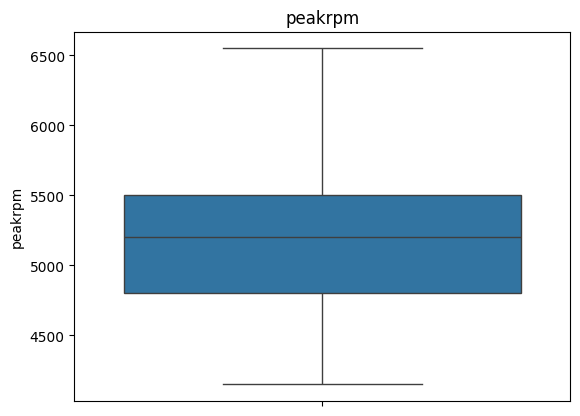

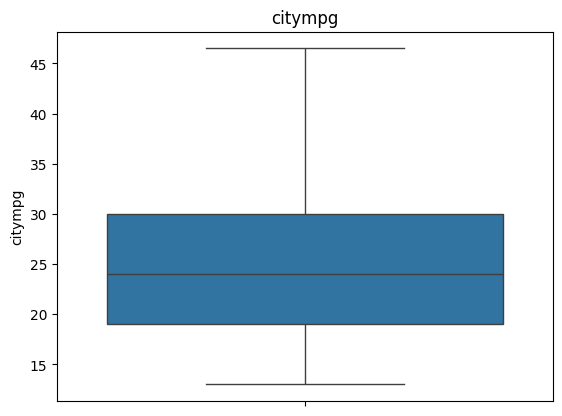

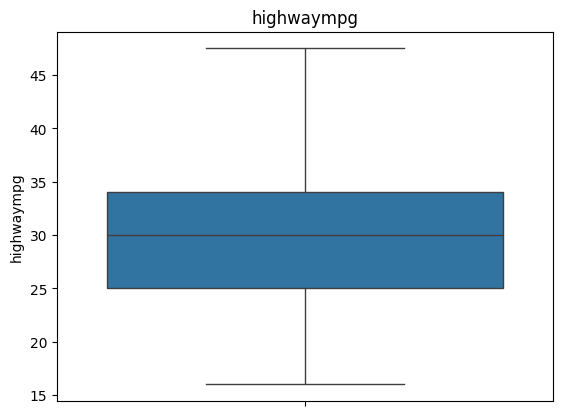

In [ ]:
for i in  df.columns[0:-1]:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

In [ ]:
# 🧩 Step 7: Splitting the Data into Features (X) and Target (y)
# I'm doing this to separate independent variables (features) from the dependent variable (target).

# Selecting features — excluding unwanted columns
x = df.iloc[:, 4:-4]   # Features (independent variables)
x.head()


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115
...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,10.6,106


In [ ]:
y = df['price']
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [ ]:
# 🎯 Step 8: Splitting the Data into Training and Testing Sets
# I'm doing this to train the model on one portion of the data
# and test its performance on unseen data for better generalization.

# Split the dataset — 75% training data, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=12)

In [ ]:
# 🤖 Step 9: Model Initialization (Model Fitting Preparation)
# I'm doing this to create different regression models
# so I can compare their performance later.

# Initialize Models
model_lr = LinearRegression()             # Linear Regression Model
model_gb = GradientBoostingRegressor()    # Gradient Boosting Regressor
model_rf = RandomForestRegressor()        # Random Forest Regressor
model_dt = DecisionTreeRegressor()        # Decision Tree Regressor

In [ ]:
# 🧠 Step 10: Model Training (Fitting the Models)
# I'm doing this to let each model learn patterns and relationships
# from the training data (x_train and y_train).

# Fit each model to the training data
model_lr.fit(x_train, y_train)   # Linear Regression
model_dt.fit(x_train, y_train)   # Decision Tree
model_rf.fit(x_train, y_train)   # Random Forest
model_gb.fit(x_train, y_train)   # Gradient Boosting


DecisionTreeRegressor()

In [ ]:
# 🔮 Step 11: Making Predictions on the Test Data
# I'm doing this to evaluate how well each trained model performs
# on unseen data (x_test).

# Generate predictions for each model
pred_lr = model_lr.predict(x_test)   # Linear Regression predictions
pred_dt = model_dt.predict(x_test)   # Decision Tree predictions
pred_rf = model_rf.predict(x_test)   # Random Forest predictions
pred_gb = model_gb.predict(x_test)   # Gradient Boosting predictions


In [ ]:
# Display Results For Linear Regression
print('MSE=',mean_squared_error(y_test,pred_lr))
print(r2_score(y_test,pred_lr))

MSE= 11416300.716543756
0.7368787610898989


In [ ]:
## Display Results For Gradient Boosting
print('MSE=',mean_squared_error(y_test,pred_gb))
print(r2_score(y_test,pred_gb))

MSE= 4584792.707171591
0.8943303643439584


In [ ]:
# # Display Results For Random_Forest
print('MSE=',mean_squared_error(y_test,pred_rf))
print(r2_score(y_test,pred_rf))

MSE= 4976201.386892723
0.885309234007128


In [ ]:
# Display The Result For Decison Tree
print('MSE=',mean_squared_error(y_test,pred_dt))
print(r2_score(y_test,pred_dt))

MSE= 6157386.653846154
0.8580854477264495


In [ ]:
# Saving The Best Machine Learning Model In The Pickle
with open ('best_pickle_car_pred',"wb") as f:
  pickle.dump(model_gd,f)

In [ ]:
x.head(1)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111


In [ ]:
model_gb.predict([[90.2,188.9,65.2,48.8,2000,150,4.42,2.89,8.0,200]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([13782.56644978])